In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
import requests

url = "https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/2024-10-14/2025-02-24?adjusted=true&sort=asc&apiKey=ugsmpODXfElyatrHY9RoIXJNXxNErmoB"
api_data = requests.get(url).json()

In [42]:
apple_df = pd.DataFrame(api_data['results'])
#apple_df["t"]
apple_df.head(1)

,v,vw,o,c,h,l,t,n
0,34386471.0,230.6959,228.7,231.3,231.73,228.6,1728878400000,580463


### the time is represented with the letter "t"
### the number is represented as a Unix Msec

In [43]:
apple_df["date"] = pd.to_datetime(apple_df['t'], origin='unix', unit='ms')

In [44]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   v       90 non-null     float64       
 1   vw      90 non-null     float64       
 2   o       90 non-null     float64       
 3   c       90 non-null     float64       
 4   h       90 non-null     float64       
 5   l       90 non-null     float64       
 6   t       90 non-null     int64         
 7   n       90 non-null     int64         
 8   date    90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 6.5 KB


In [45]:
apple_df = apple_df.set_index('date')

In [ ]:
mapping = {
    "o" : "open",
    "c": "close",
    "h": "high",
    "l": "low",
    "n": "number",
    "v": "volume",
    "vw":"avg_price"
}

apple_df = apple_df.rename(columns=mapping)

<AxesSubplot:xlabel='date'>

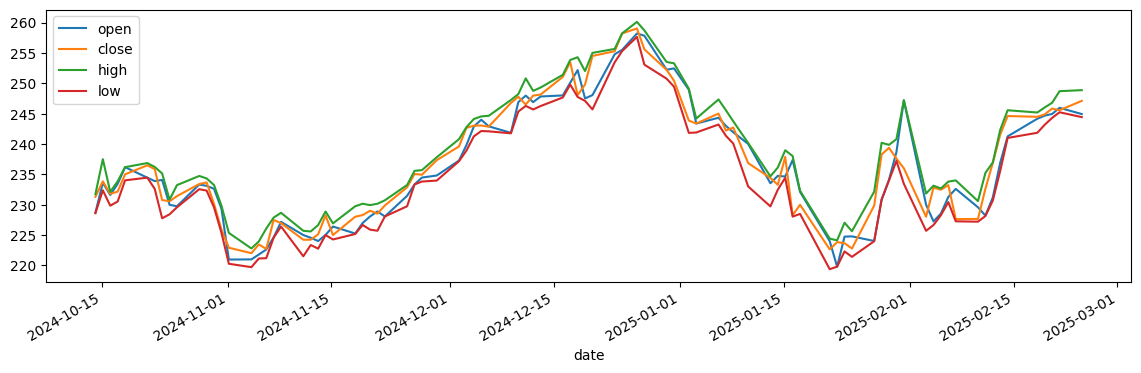

In [59]:
apple_df[['open', 'close', 'high', 'low']].plot(figsize=(14,4))
